# Forecasting Lab 10

## Part 1: Using the Iris dataset from sklearn, implement Multilayer Perceptron

### Prerequisites: Load Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Step 1: Download and load dataset

In [2]:
# Importing the Iris dataset
iris = datasets.load_iris()

# Creating a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adding the target column
iris_df['target'] = iris.target

# Displaying the first 5 rows
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Step 2: Preprocess Dataset

In [3]:
#Check for missing data
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [4]:
#Check columns data types
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [5]:
#Display Statistical Overview
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
#Get dataframe dimensions using shape
iris_df.shape

(150, 5)

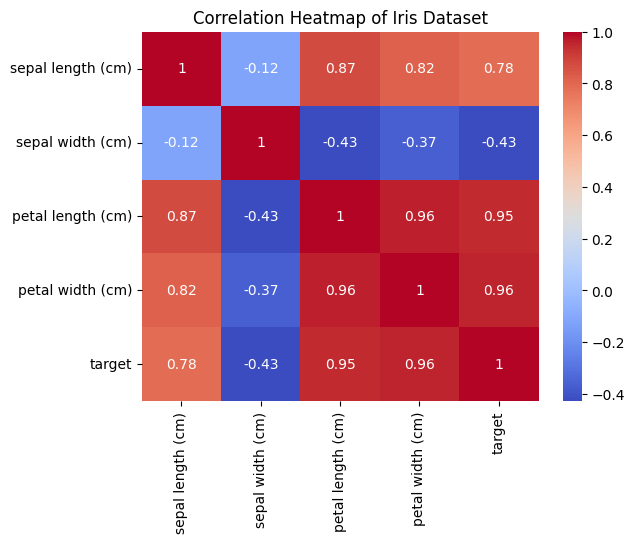

In [7]:
#Check for correlations and plot the results using a heatmap
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

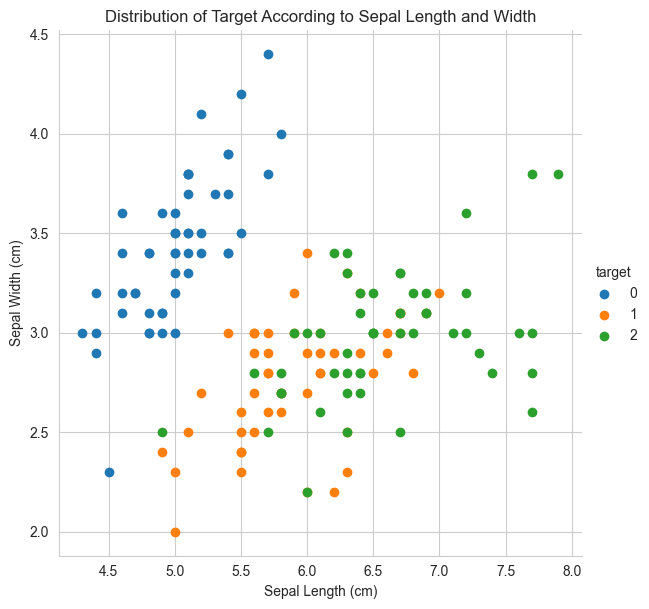

In [8]:
#Plot the distribution of target according to sepal lengths and widths
sns.set_style("whitegrid")

Facet_Grid = sns.FacetGrid(iris_df, hue="target", height=6)
Facet_Grid.map(plt.scatter, "sepal length (cm)", "sepal width (cm)")

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Distribution of Target According to Sepal Length and Width")

Facet_Grid.add_legend()

plt.show()

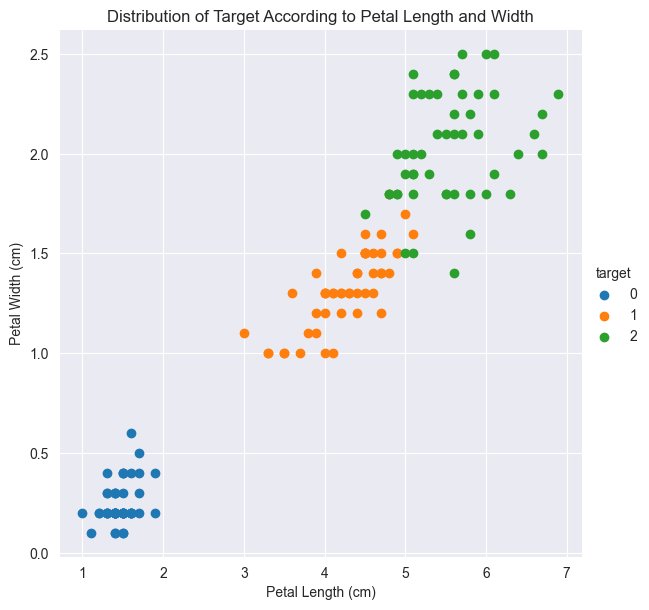

In [ ]:
#Plot the distribution of target according to petal lengths and widths
sns.set_style("darkgrid")
grid = sns.FacetGrid(iris_df, hue="target", height=6)
grid.map(plt.scatter, "petal length (cm)", "petal width (cm)")

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Distribution of Target According to Petal Length and Width")

grid.add_legend()

plt.show()


In [10]:
#Split dataframe into features and target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

In [11]:
#Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 3: Fit the model and make predictions

In [13]:
#Create an instance of MLPClassifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64,64), 
    max_iter=300,
    activation='relu', 
    solver='adam', 
    random_state=1)

In [14]:
#Train the model
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=300, random_state=1)

In [15]:
#Make predictions
y_pred = mlp_clf.predict(X_test)

### Step 4: Evaluate the Model

In [16]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


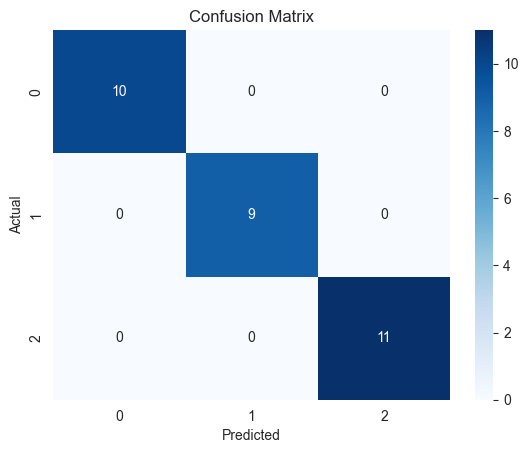

In [18]:
#Plot the confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
#Accuracy Score
accuracy = (accuracy_score(y_test, y_pred)) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 100.00%


# Using the California Housing dataset from sklearn, implement Multilayer Perceptron

### Prerequisites

In [21]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Step 1: Download and load dataset

In [22]:
# Importing the California Housing dataset
california = fetch_california_housing()

# Creating a DataFrame
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)

# Adding the target column as 'MedHouseVal' (median house value)
california_df['MedHouseVal'] = california.target

# Displaying the first 5 rows
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Step 2: Preprocess Dataset

In [23]:
#Check for missing data
california_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [24]:
#Check columns data types
california_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [25]:
#Display Statistical Overview using describe
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [26]:
#Get dataframe dimensions using shape
california_df.shape

(20640, 9)

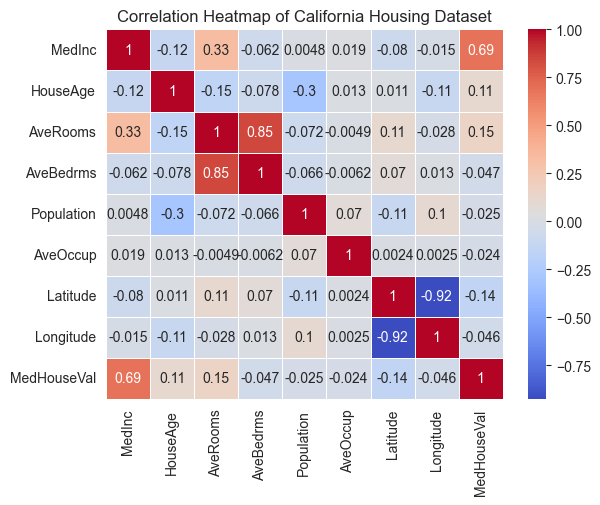

In [27]:
#Check for correlations and plot the results using a heat map
sns.heatmap(california_df.corr(), annot=True, cmap='coolwarm', linewidths= 0.5)
plt.title("Correlation Heatmap of California Housing Dataset")
plt.show()

In [28]:
#Split dataframe into features and target
X = california_df.drop('MedHouseVal', axis=1)
y = california_df['MedHouseVal']

In [29]:
#Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 3: Fit the model and make predictions

In [31]:
#Create an instance of MLPRegressor
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(50, 50),
    max_iter=1000,
    random_state=1
)

In [32]:
#Train the model
mlp_reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=1)

In [33]:
#Make predictions
y_pred = mlp_reg.predict(X_test)

### Step 4: Evaluate the Model

In [34]:
#Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.3672236546228006


In [35]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.27841069108791294


In [36]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.5276463693496933


In [38]:
#r2 Score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.7875390845828506


In [40]:
#Mean Absolute Percentage Error
mape = (mean_absolute_percentage_error(y_test, y_pred)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 21.968988085331276%
